In [236]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [237]:
file = pd.read_csv(r"D:\my prepared dataset\credit model german\Bank Customer Churn Prediction.csv")

In [238]:
file = file.drop(['customer_id'], axis=1)

In [450]:
file

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# isnull 

In [239]:
file.isnull().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

# Outliers Detection and removal

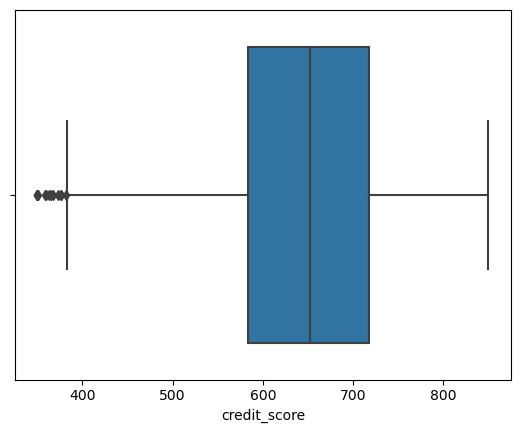

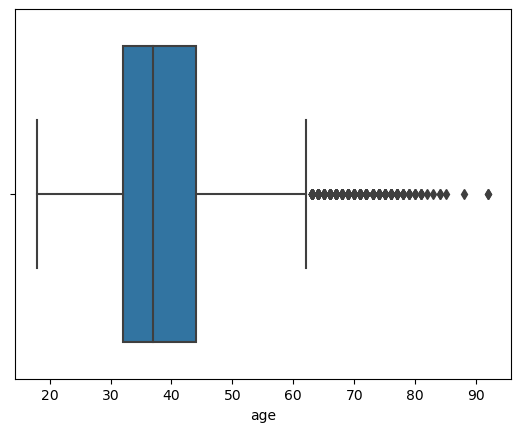

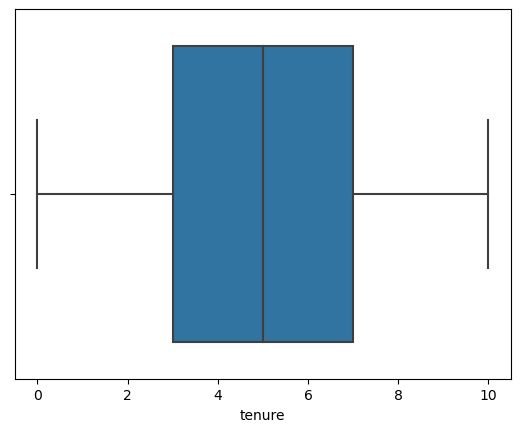

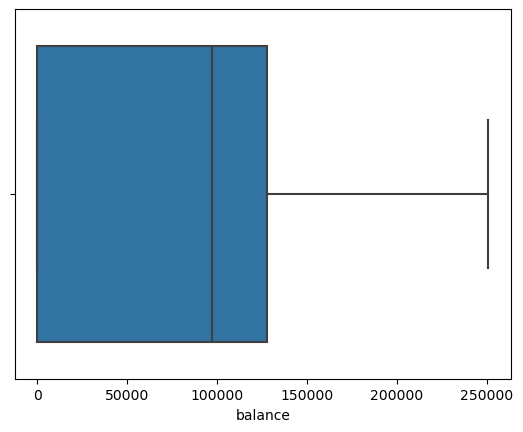

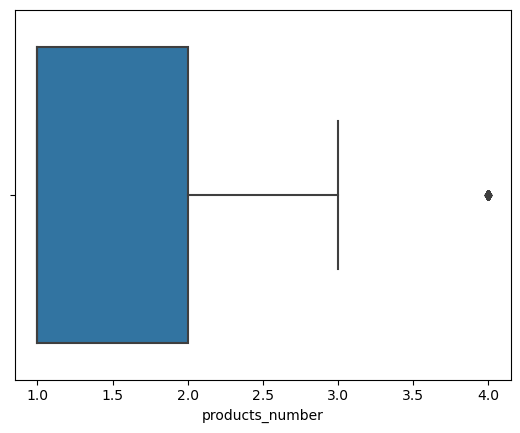

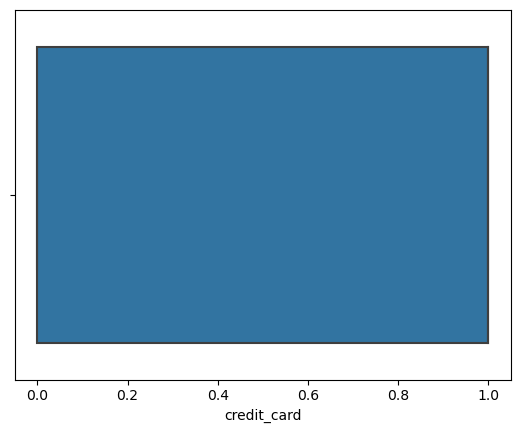

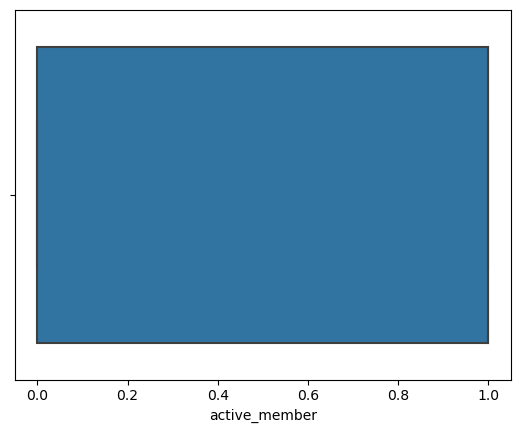

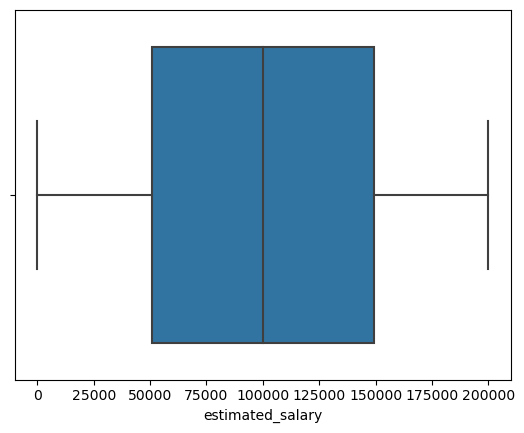

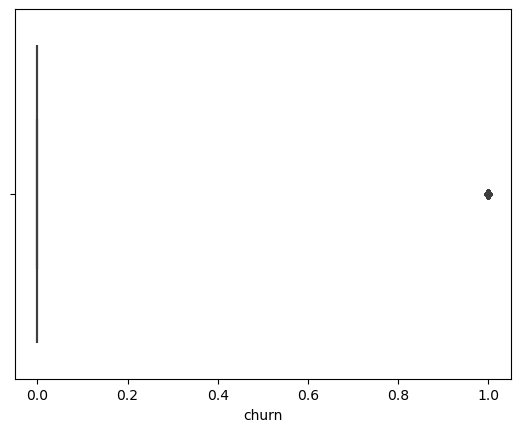

In [240]:
for i in file.columns:
    if file[i].dtypes != 'object':
        sns.boxplot(data=file, x=i)
        plt.show()

In [241]:
file1 = file[file['credit_score'] >= 380]
file2 = file1[file1['age'] <= 59]

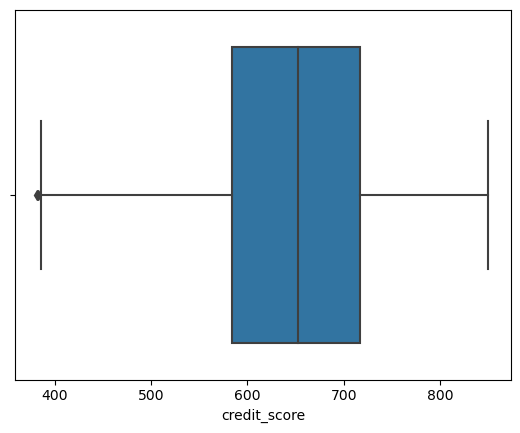

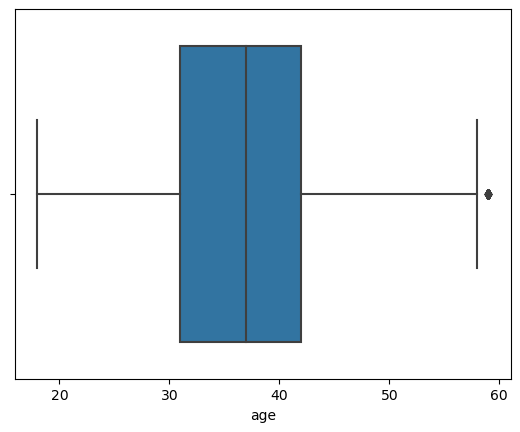

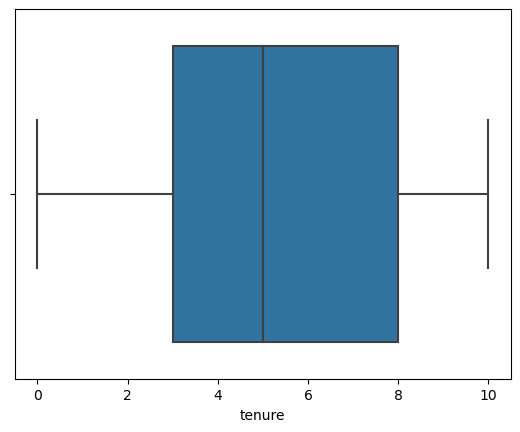

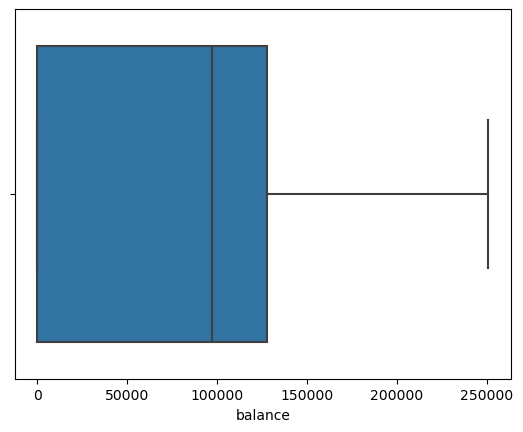

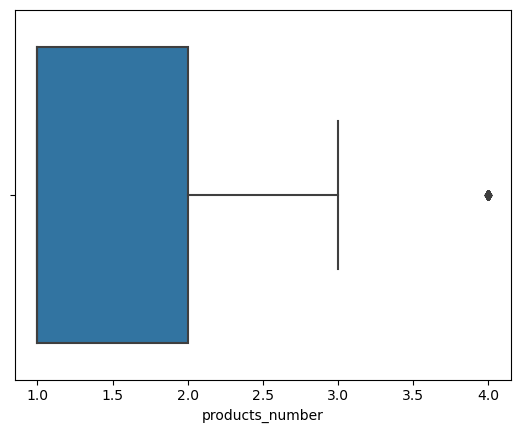

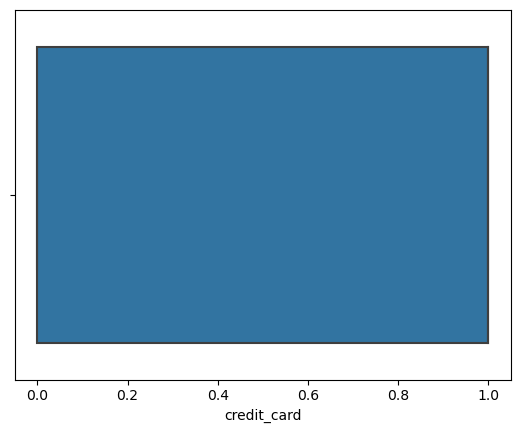

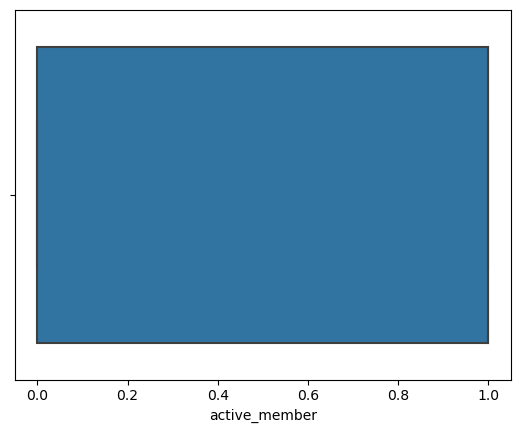

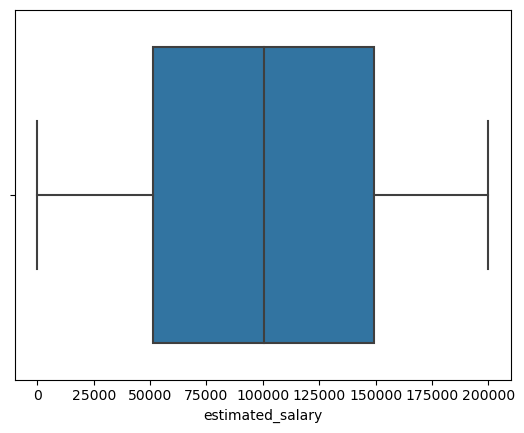

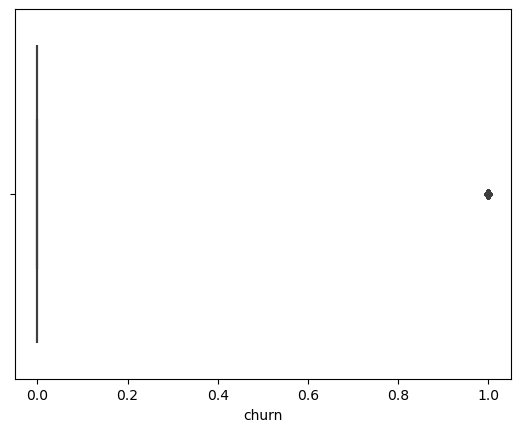

In [242]:
for i in file2.columns:
    if file2[i].dtypes != 'object':
        sns.boxplot(data=file2, x=i)
        plt.show()

In [243]:
file2.shape

(9461, 11)

In [244]:
file3 = file2.reset_index()
file4 = file3.drop(['index'], axis=1)

# encoding 

In [245]:
from sklearn.preprocessing import OneHotEncoder

In [246]:
cate = [i for i in file4.columns if file4[i].dtypes =='object']

categorical = file4[cate]

num = [i for i in file4.columns if file4[i].dtypes !='object']

numerical = file4[num]

In [247]:
ohe = OneHotEncoder(drop='first', sparse=False)

In [248]:
encoded = pd.DataFrame(ohe.fit_transform(categorical))

C:\Users\ravin\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [249]:
final = pd.merge(numerical, encoded, right_index=True, left_index=True)

# Assumption check 

In [250]:
x = final.drop(['churn'], axis=1)
y = final['churn']

# Multicollinearity check

<Axes: >

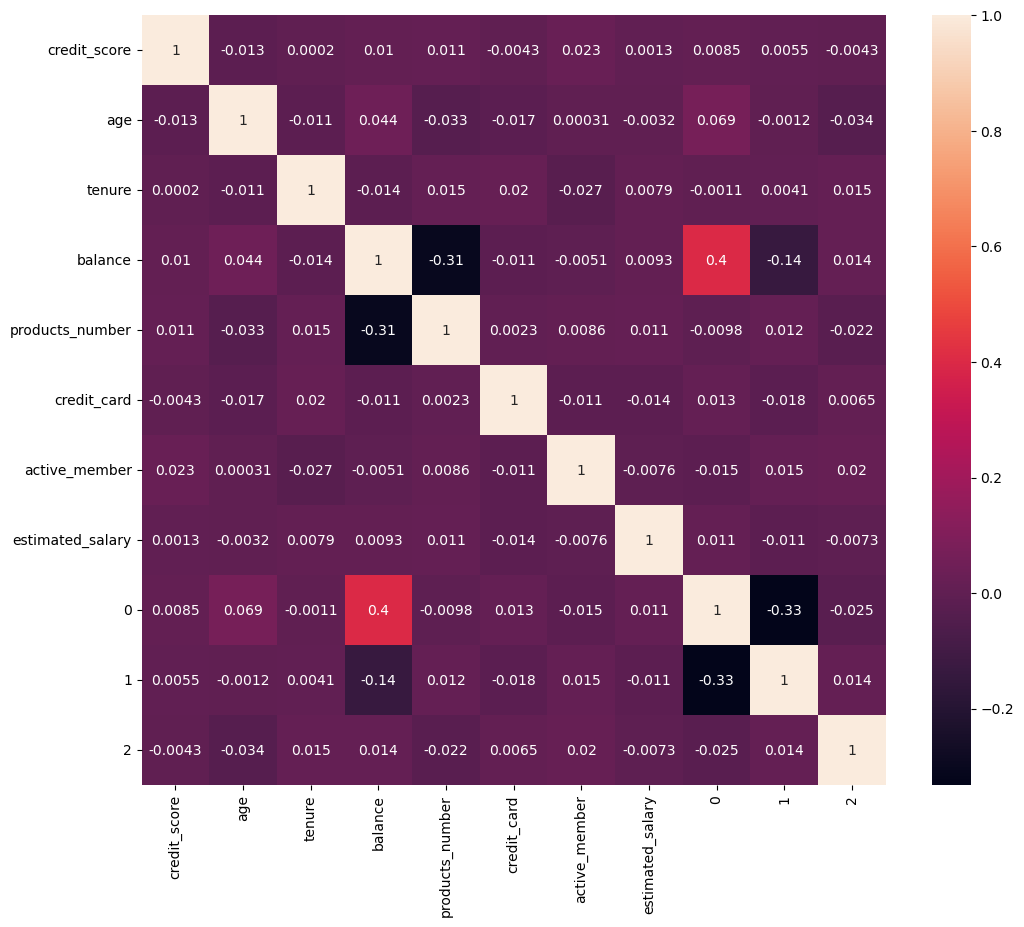

In [251]:
plt.figure(figsize=(12,10))
sns.heatmap(x.corr(), annot=True)

# Smote Imbalace 

In [557]:
y.value_counts()

0    7584
1    1877
Name: churn, dtype: int64

In [558]:
from imblearn.over_sampling import SMOTE

In [559]:
x.columns = x.columns.astype(str)

In [560]:
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Fit and apply SMOTE to the dataset
X_resampled, y_resampled = smote.fit_resample(x, y)

In [561]:
y_resampled.value_counts()

1    7584
0    7584
Name: churn, dtype: int64

In [562]:
X_resampled.shape

(15168, 11)

In [563]:
end = X_resampled.drop_duplicates()

# Normalisation

In [564]:
from sklearn.preprocessing import RobustScaler

In [565]:
ss = RobustScaler()

X_resampled1 = pd.DataFrame(ss.fit_transform(X_resampled))

In [592]:
X_resampled1

,0,1,2,3,4,5,6,7,8,9,10
0,-0.241935,0.272727,-0.75,-0.797888,0.0,0.0,1.0,0.008586,0.0,0.000000,-0.565327
1,-0.330645,0.181818,-1.00,-0.147413,0.0,-1.0,1.0,0.122119,0.0,3.056694,-0.565327
2,-1.185484,0.272727,0.75,0.441320,2.0,0.0,0.0,0.136207,0.0,0.000000,-0.565327
3,0.403226,0.000000,-1.00,-0.797888,1.0,-1.0,0.0,-0.067709,0.0,0.000000,-0.565327
4,1.620968,0.363636,-0.75,0.176265,0.0,0.0,1.0,-0.217236,0.0,3.056694,-0.565327
...,...,...,...,...,...,...,...,...,...,...,...
15163,0.612903,0.909091,-0.50,-0.045456,0.0,0.0,0.0,-0.243007,1.0,0.000000,0.162382
15164,0.782258,1.636364,-0.75,0.240541,2.0,-1.0,0.0,-0.732733,1.0,0.000000,0.361122
15165,-0.088710,-0.636364,0.25,-0.797888,0.0,-1.0,0.0,-0.328635,0.0,2.375821,-0.565327
15166,-0.459677,1.272727,0.50,0.134796,0.0,0.0,0.0,-0.361596,1.0,0.000000,0.183237


# train test split

In [566]:
from sklearn.model_selection import train_test_split

In [567]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled1, y_resampled, test_size=0.20, stratify=y_resampled, random_state=42)

# model building 

# Linear Regression

In [568]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [569]:
lr = LogisticRegression()

In [570]:
x_train.columns = x_train.columns.astype(str)

In [571]:
lr.fit(x_train, y_train)

LogisticRegression()

In [572]:
predict = lr.predict(x_train)

In [573]:
predict1 = lr.predict(x_test)

C:\Users\ravin\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# accuracy check 

In [574]:
accuracy_score(predict, y_train)

0.7737761661447173

In [575]:
accuracy_score(predict1, y_test)

0.7712590639419907

In [576]:
confusion_matrix(predict, y_train)

array([[4672, 1350],
       [1395, 4717]], dtype=int64)

In [628]:
confusion_matrix(predict1, y_test)

array([[1161,  338],
       [ 356, 1179]], dtype=int64)

# Post Linear Relationship Assumption

In [467]:
w = [-0.06805265,  1.41082078, -0.19956209,  0.14024415, -0.67154273,
        -0.67233318, -1.67158987,  0.03895472,  0.98122056, -0.00896368,
        -0.58914402]

In [579]:
b = 0.22519421

In [612]:
y_pred = np.dot(X_resampled1, w) + b


In [613]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [614]:
sigmoid_values = sigmoid(y_pred)

In [620]:
def odds1(sig):
    return sig / (1 - sig)

In [622]:
odds2 = odds1(sigmoid_values)

In [626]:
log1 = np.log(odds2)

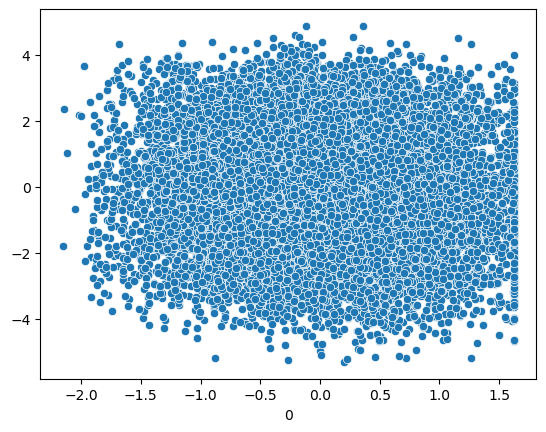

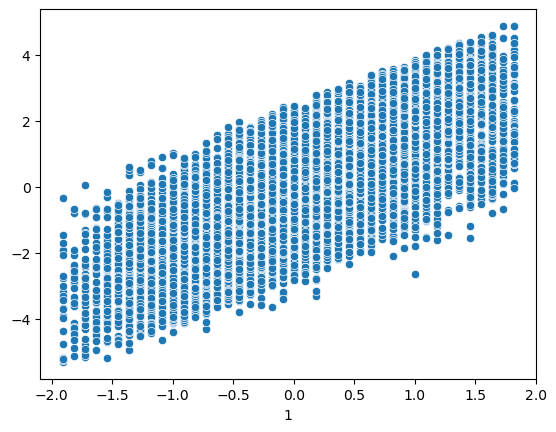

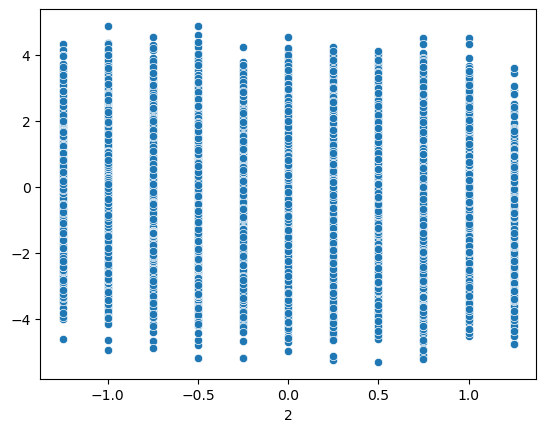

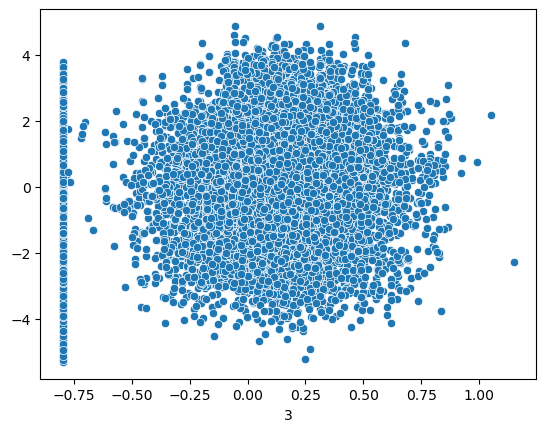

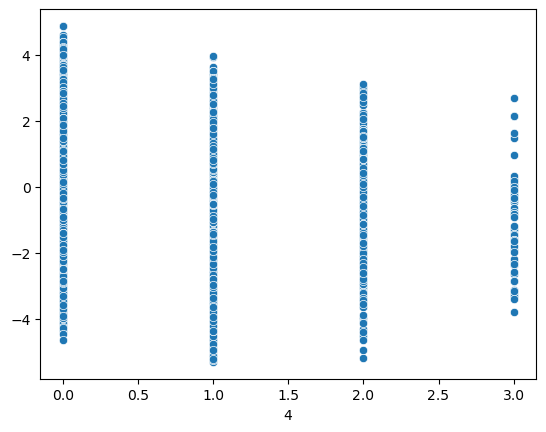

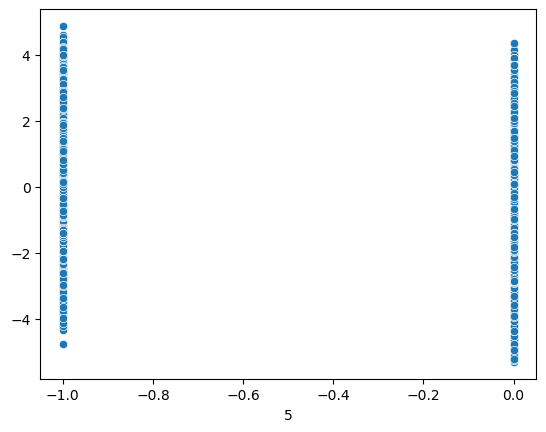

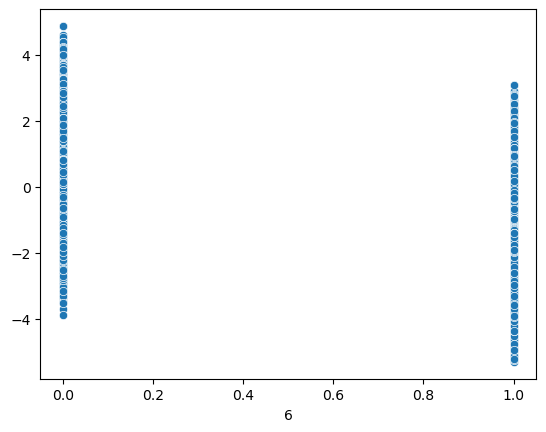

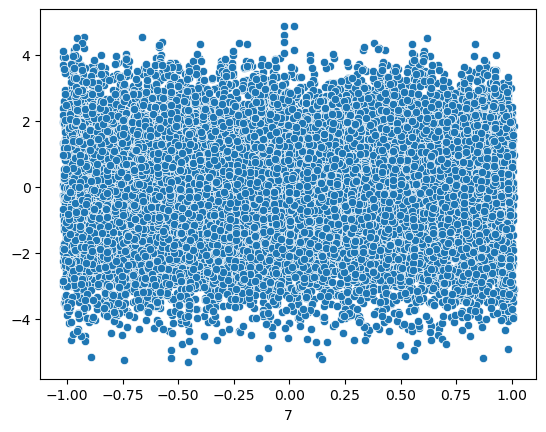

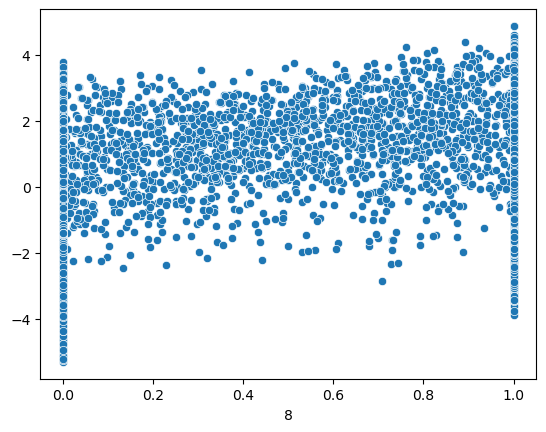

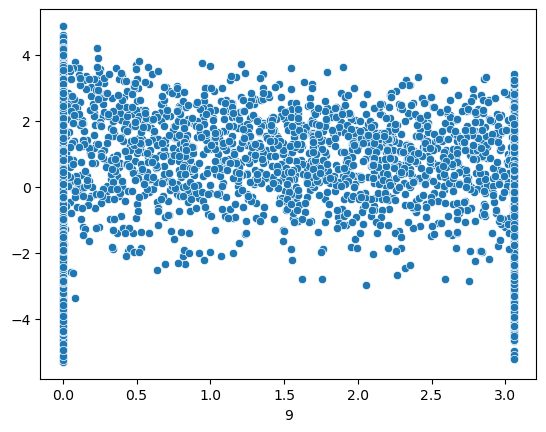

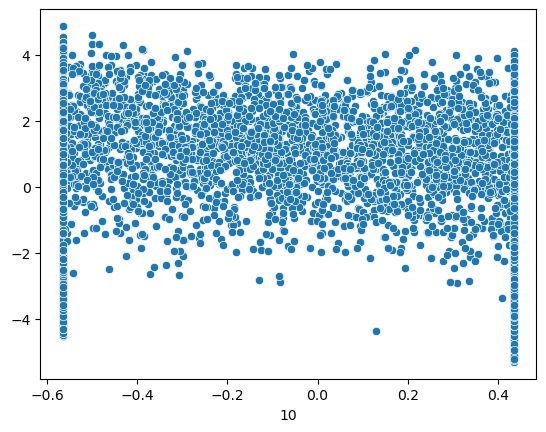

In [627]:
for i in X_resampled1.columns:
    sns.scatterplot(data=X_resampled1, x=i, y = log1)
    plt.show()

# Random Forest Classifier 

In [399]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier( max_depth=4, n_estimators=93)

rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=93)

In [400]:
predict_r = rfc.predict(x_train)
predict_rt = rfc.predict(x_test)

C:\Users\ravin\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [401]:
accuracy_score(predict_r, y_train)

0.8442393275094775

In [402]:
accuracy_score(predict_rt, y_test)

0.8358602504943968

In [403]:
confusion_matrix(predict_r, y_train)

array([[5219, 1042],
       [ 848, 5025]], dtype=int64)

In [404]:
confusion_matrix(predict_rt, y_test)

array([[1290,  271],
       [ 227, 1246]], dtype=int64)

# KNN

In [405]:
from sklearn.neighbors import KNeighborsClassifier


In [413]:
knn = KNeighborsClassifier(weights='uniform', n_neighbors=10, leaf_size=8)

In [414]:
knn.fit(x_train, y_train)

KNeighborsClassifier(leaf_size=8, n_neighbors=10)

In [415]:
predict_k = knn.predict(x_train)
predict_kt = knn.predict(x_test)

C:\Users\ravin\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [416]:
accuracy_score(predict_k, y_train)

0.8584967858908851

In [417]:
accuracy_score(predict_kt, y_test)

0.8154251812788398

In [418]:
confusion_matrix(predict_k, y_train)

array([[5330,  980],
       [ 737, 5087]], dtype=int64)

In [419]:
confusion_matrix(predict_kt, y_test)

array([[1267,  310],
       [ 250, 1207]], dtype=int64)

# SVM 

In [420]:
from sklearn.svm import SVC

In [421]:
svc = SVC()

In [422]:
svc.fit(x_train, y_train)

SVC()

In [423]:
predict_s = svc.predict(x_train)

predict_s1 = svc.predict(x_test)

C:\Users\ravin\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [424]:
accuracy_score(predict_s, y_train)

0.8598153947585297

In [425]:
accuracy_score(predict_s1, y_test)

0.8404746209624259

In [426]:
confusion_matrix(predict_s, y_train)

array([[5381, 1015],
       [ 686, 5052]], dtype=int64)

In [427]:
confusion_matrix(predict_s1, y_test)

array([[1312,  279],
       [ 205, 1238]], dtype=int64)

# Gradient Boost

In [428]:
from sklearn.ensemble import GradientBoostingClassifier

In [429]:
gbc = GradientBoostingClassifier()

In [430]:
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [431]:
predict_g = gbc.predict(x_train)

predict_g1 = gbc.predict(x_test)

C:\Users\ravin\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [432]:
accuracy_score(predict_g, y_train)

0.8849513762980056

In [433]:
accuracy_score(predict_g1, y_test)

0.8747528015820699

In [434]:
confusion_matrix(predict_g, y_train)

array([[5566,  895],
       [ 501, 5172]], dtype=int64)

In [435]:
confusion_matrix(predict_g1, y_test)

array([[1378,  241],
       [ 139, 1276]], dtype=int64)

# Extreme Gradient Boosting (XGBOOST)

In [436]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [451]:
xg = xgb.XGBClassifier(random_state=42, max_depth =3, n_estimators=150)

In [452]:
xg.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [453]:
predict_x = xg.predict(x_train)

predict_x1 = xg.predict(x_test)

In [454]:
accuracy_score(predict_x, y_train)

0.9051425745838141

In [455]:
accuracy_score(predict_x1, y_test)

0.8829927488464074

In [456]:
confusion_matrix(predict_x, y_train)

array([[5659,  743],
       [ 408, 5324]], dtype=int64)

In [457]:
confusion_matrix(predict_x1, y_test)

array([[1383,  221],
       [ 134, 1296]], dtype=int64)

# ROC_score

In [458]:
roc_auc_score(predict_x, y_train)

0.9063815869648202

In [459]:
roc_auc_score(predict_x1, y_test)

0.8842565788326388

# ROC Curve

In [460]:
roc_curve(predict_x, y_train)

(array([0.        , 0.11605748, 1.        ]),
 array([0.        , 0.92882066, 1.        ]),
 array([inf,  1.,  0.]))

In [461]:
roc_curve(predict_x1, y_test)

(array([0.        , 0.13778055, 1.        ]),
 array([0.        , 0.90629371, 1.        ]),
 array([inf,  1.,  0.]))

In [462]:
fpr, tpr, thresholds = roc_curve(y_train, predict_x)

roc_auc = auc(fpr, tpr)

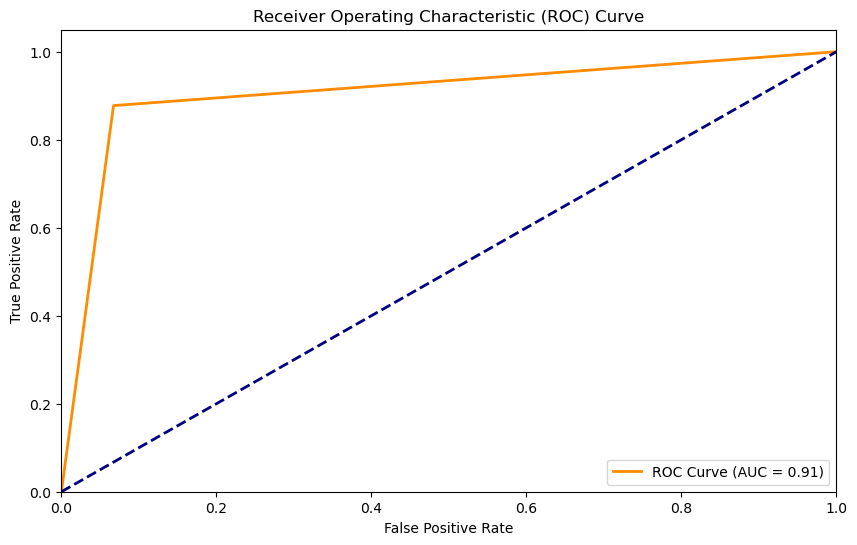

In [463]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
